In [6]:
# import linecache
# import numpy as np
# def load_raw_audio(size):
#     audio=[]
#     filenames=[]
#     transcript=[]
#     for speaker in os.listdir("../dataset/dev/dev-clean/"):
#         for chapter in os.listdir("../dataset/dev/dev-clean/"+speaker):
#             for filename in os.listdir("../dataset/dev/dev-clean/"+speaker+"/"+chapter):
#                 if filename.endswith(".flac"):
#                     audio.append(spectrogram_from_file("./../dataset/dev/dev-clean/"+speaker+"/"+chapter+"/"+filename))
#                     line = linecache.getline("./../dataset/dev/dev-clean/"+speaker+"/"+chapter+"/"+"".join(list(filename)[:-10])+".trans.txt", int("".join(list("".join(list(filename)[:-5]))[-4:]))+1)
#                     transcript.append(line)
#                     filenames.append("".join(list(filename)[:-5]))
#                 if len(audio)>size:
#                     break
#     return audio,filenames,transcript

In [9]:
# def transcript_cleaner(transcript):
#     for i in range(len(transcript)):
#         transcript[i]=transcript[i].split(' ',1)[1]
# transcript_cleaner(trans_dev)

In [11]:
# def transcript_to_index(transcript):
#     transcript_to_index=[]
#     for line in transcript:
#         line_to_index=[]
#         for character in list(line)[:-1]:
#             if character==' ':
#                 character='<SPACE>'
#             line_to_index.append(char_map[character])
#         transcript_to_index.append(line_to_index)
#     return transcript_to_index

In [1]:
char_map_str = """
' 1
<SPACE> 2
A 3
B 4
C 5
D 6
E 7
F 8
G 9
H 10
I 11
J 12
K 13
L 14
M 15
N 16
O 17
P 18
Q 19
R 20
S 21
T 22
U 23
V 24
W 25
X 26
Y 27
Z 28
"""
char_map = {}
index_map = {}
for line in char_map_str.strip().split('\n'):
    ch, index = line.split()
    char_map[ch] = int(index)
    index_map[int(index)] = ch
index_map[2] = ' '

In [2]:
from numpy.lib.stride_tricks import as_strided
import soundfile
from matplotlib import pyplot as plt
def spectrogram(samples, fft_length=256, sample_rate=2, hop_length=128):

    assert not np.iscomplexobj(samples), "Must not pass in complex numbers"

    window = np.hanning(fft_length)[:, None]
    window_norm = np.sum(window**2)

    scale = window_norm * sample_rate

    trunc = (len(samples) - fft_length) % hop_length
    x = samples[:len(samples) - trunc]

    nshape = (fft_length, (len(x) - fft_length) // hop_length + 1)
    nstrides = (x.strides[0], x.strides[0] * hop_length)
    x = as_strided(x, shape=nshape, strides=nstrides)

    assert np.all(x[:, 1] == samples[hop_length:(hop_length + fft_length)])
    x = np.fft.rfft(x * window, axis=0)
    x = np.absolute(x)**2
    x[1:-1, :] *= (2.0 / scale)
    x[(0, -1), :] /= scale

    freqs = float(sample_rate) / fft_length * np.arange(x.shape[0])

    return x, freqs

In [3]:
def spectrogram_from_file(filename, step=10, window=20, max_freq=None,
                          eps=1e-14):
    with soundfile.SoundFile(filename) as sound_file:
        audio = sound_file.read(dtype='float32')
        sample_rate = sound_file.samplerate
        if audio.ndim >= 2:
            audio = np.mean(audio, 1)
        if max_freq is None:
            max_freq = sample_rate / 2
        if max_freq > sample_rate / 2:
            raise ValueError("max_freq must not be greater than half of "
                             " sample rate")
        if step > window:
            raise ValueError("step size must not be greater than window size")
        hop_length = int(0.001 * step * sample_rate)
        fft_length = int(0.001 * window * sample_rate)
        pxx, freqs = spectrogram(
            audio, fft_length=fft_length, sample_rate=sample_rate,
            hop_length=hop_length)
        ind = np.where(freqs <= max_freq)[0][-1] + 1
    return np.transpose(np.log(pxx[:ind, :] + eps))

In [4]:
import linecache
import numpy as np
import pandas as pd
def load_all_data():
    #audio=[]
    #filenames=[]
    #transcript=[]
    data=[]
    for speaker in os.listdir("../dataset/dev/dev-clean/"):
        for chapter in os.listdir("../dataset/dev/dev-clean/"+speaker):
            for filename in os.listdir("../dataset/dev/dev-clean/"+speaker+"/"+chapter):
                if filename.endswith(".flac"):
                    #audio.append(spectrogram_from_file("./../dataset/dev/dev-clean/"+speaker+"/"+chapter+"/"+filename))
                    line = linecache.getline("./../dataset/dev/dev-clean/"+speaker+"/"+chapter+"/"+"".join(list(filename)[:-10])+".trans.txt", int("".join(list("".join(list(filename)[:-5]))[-4:]))+1)
                    #transcript.append(line)
                    #filenames.append("".join(list(filename)[:-5]))
                    source="./../dataset/dev/dev-clean/"+speaker+"/"+chapter+"/"+filename
                    sample=(source,line)
                    data.append(sample)
    #df = pd.DataFrame(data, columns = ['source','transcript'])
    return data

In [8]:
def process_input_file(sample):
    source,transcript=sample
    
    transcript=transcript.split(' ',1)[1]
    # print(transcript)
    # print(source)
    line_to_index=[]
    for character in list(transcript)[:-1]:
        if character==' ':
                character='<SPACE>'
        line_to_index.append(char_map[character])
    processed_input=(spectrogram_from_file(source),line_to_index)
    return processed_input

2703
OFTEN WOULD HE AVAIL HIMSELF OF ANY SPECIAL GRACE OF HIS OWN IDIOM AND EPOCH IF ONLY HIS WILL BELONGED TO HIM OFTEN WOULD SOME CADENCE SERVE HIM BUT FOR HIS AUTHOR'S STRUCTURE SOME STRUCTURE BUT FOR HIS AUTHOR'S CADENCE OFTEN THE BEAUTIFUL TURN OF A STANZA MUST BE WEAKENED TO ADOPT SOME RHYME WHICH WILL TALLY AND HE SEES THE POET REVELLING IN ABUNDANCE OF LANGUAGE WHERE HIMSELF IS SCANTILY SUPPLIED

./../dataset/dev/dev-clean/8842/302196/8842-302196-0005.flac
[17, 8, 22, 7, 16, 2, 25, 17, 23, 14, 6, 2, 10, 7, 2, 3, 24, 3, 11, 14, 2, 10, 11, 15, 21, 7, 14, 8, 2, 17, 8, 2, 3, 16, 27, 2, 21, 18, 7, 5, 11, 3, 14, 2, 9, 20, 3, 5, 7, 2, 17, 8, 2, 10, 11, 21, 2, 17, 25, 16, 2, 11, 6, 11, 17, 15, 2, 3, 16, 6, 2, 7, 18, 17, 5, 10, 2, 11, 8, 2, 17, 16, 14, 27, 2, 10, 11, 21, 2, 25, 11, 14, 14, 2, 4, 7, 14, 17, 16, 9, 7, 6, 2, 22, 17, 2, 10, 11, 15, 2, 17, 8, 22, 7, 16, 2, 25, 17, 23, 14, 6, 2, 21, 17, 15, 7, 2, 5, 3, 6, 7, 16, 5, 7, 2, 21, 7, 20, 24, 7, 2, 10, 11, 15, 2, 4, 23, 22, 2, 8, 17

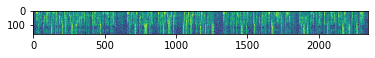

In [11]:
data=load_all_data()
print(len(data))
spec,text=process_input_file(data[0])
print(text)
plt.imshow(np.transpose(spec))

In [22]:
import keras

class DataGenerator(keras.utils.Sequence):
    'Generates data for Keras'
    def __init__(self,batch_size=256,shuffle=True):
        'Initialization'
       
        self.batch_size = batch_size
        self.shuffle = shuffle        
        self.data=load_all_data()
        self.list_IDs = len(data)
        self.on_epoch_end()

    def __len__(self):
        'Denotes the number of batches per epoch'
        return int(np.floor(self.list_IDs / self.batch_size))

    def __getitem__(self, index):
        'Generate one batch of data'
        # Generate indexes of the batch
        indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]

        # Find list of IDs
        list_IDs_temp = [self.list_IDs[k] for k in indexes]

        # Generate data
        X, y = self.__data_generation(list_IDs_temp)

        return X, y

    def on_epoch_end(self):
        'Updates indexes after each epoch'
        self.indexes = np.arange(self.list_IDs)
        if self.shuffle == True:
            np.random.shuffle(self.indexes)

    def __data_generation(self, list_IDs_temp):
        'Generates data containing batch_size samples' # X : (n_samples, *dim, n_channels)
        # Initialization
        X = []
        Y = []

        # Generate data
        for i, ID in enumerate(list_IDs_temp):
            # Store sample
            x,y=process_input_file(self.data[i])
            X.append(x)
            Y.append(y)          

        return X, y

In [23]:
train_gen=DataGenerator()